In [14]:
import torch
from torchvision.transforms import Resize, Compose, InterpolationMode
from torchvision.io import read_image
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
import pickle
from torch.fft import fftshift, fftn, ifftn

In [7]:
with open("samples_dutifulpond10.obj", "rb") as f:
    space = torch.load(f)
space.shape

torch.Size([16, 1, 128, 128])

/scratch_net/biwidl311/peerli/conda_envs/liotorch/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the

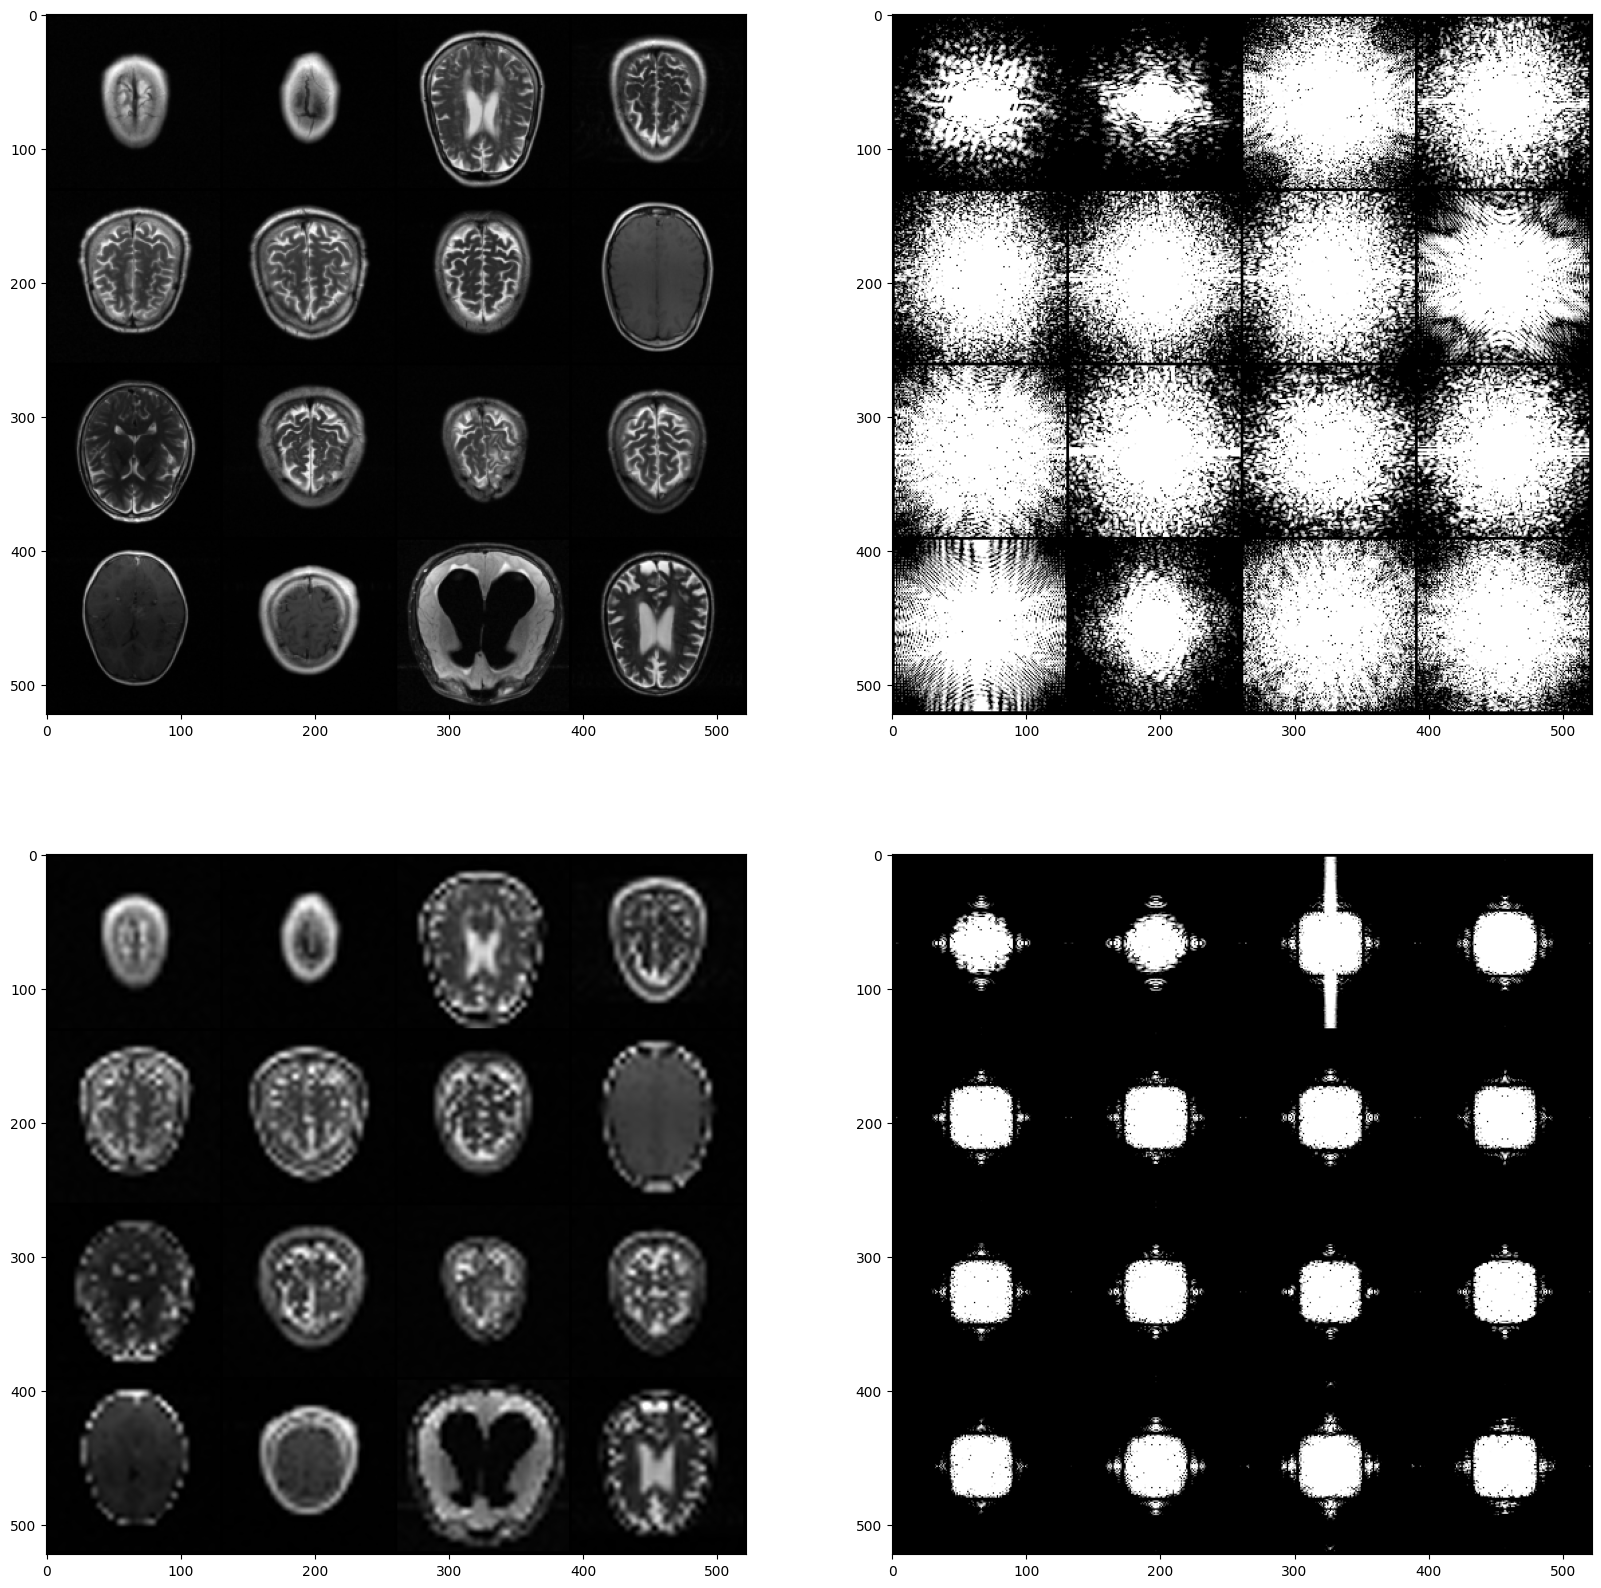

In [15]:
transform = Compose([Resize((32,32), interpolation=InterpolationMode.BICUBIC), Resize((128,128), interpolation=InterpolationMode.BICUBIC)])
spectrum = torch.log(torch.abs(fftshift(fftn(space, dim=(2,3)), dim=(2,3))))

space_blur = transform(space)
spectrum_blur = torch.log(torch.abs(fftshift(fftn(space_blur, dim=(2,3)), dim=(2,3))))

fig, ax = plt.subplots(2,2, figsize=(20,20))
ax[0,0].imshow(make_grid(space, nrow=4).permute(1,2,0))
ax[0,1].imshow(make_grid(spectrum, nrow=4).permute(1,2,0))
ax[1,0].imshow(make_grid(space_blur, nrow=4).permute(1,2,0))
ax[1,1].imshow(make_grid(spectrum_blur, nrow=4).permute(1,2,0))